<center>
    <h1> Tarea 3 </h1>
    <br>
    Rafael Calvo -  rafael.calvo.12@sansano.usm.cl  -  rol: 201273506-8
</center>
</center>

***Ojo! los grafos deben estar en una carpeta llamada "Datos" <- con D mayuscula***


Primero incorporar las librerías a utilizar:

In [1]:
from math import sqrt
from IPython.display import Math, Latex
from IPython.display import Image, display
from collections import defaultdict
#import cairocffi as cairo 
import random
import igraph as ig
import numpy as np
import matplotlib.pylab as plt

# ---- utility
def plot_as_png(plot):
    sur = plot._surface 
    ctx = plot._ctx 
    plot.redraw(ctx)
    sur.write_to_png('/tmp/temp.png') 
    display(Image('/tmp/temp.png'))

### 1. Genere un grafo ER de 80 nodos, con probabilidad de conexión 0.2:


Creación de grafo:


*NOTA: Hay una variable NNN que aumenta la cantidad de repeticiones, si se demora demasiado usar valores más chicos.*

In [2]:
# grafico ER con probabilidad 0.2, no dirigido.
ER = ig.Graph.Erdos_Renyi(80, 0.2)

In [3]:
# Obtenemos las particiones C1 y C2
C1 = []
C2 = []
for i in range(len(ER.vs)):
    if i < 20:
        C1.append(i)

    elif i >= 20 and i < 40:
        C2.append(i)

    elif i >= 40 and i < 60:
        C1.append(i)

    else:
        C2.append(i)

# definimos las B para usar mas adelante
particiones_B = ER.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))

rep_mod1 = []
rep_mod2 = []

# NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
# NNNNNNNNNNNNNNNNNNNNNN esta: NNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNN = 100
# NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
# NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


for i in range(NNN):
    print i+1,
    mod1 = []  
    mod2 = []
    for prob in np.arange(0.0, 1.1, 0.1):
        P1 = ig.Graph(80, directed=True)
        P2 = ig.Graph(80, directed=True)
        for edge in ER.es:
            p = random.random() 
            source = edge.tuple[0]
            target = edge.tuple[1]
    
            # si es un arco entre particiones B:
            if edge in particiones_B:
                if p <= prob:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)
            
            # si no, bernoulli:
            else:
                if p <= 0.5:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)

        edges1 = P1.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))
        edges2 = P2.es.select(_between=(ER.vs.select(C1), ER.vs.select(C2)))

        for e1 in P1.es:
            if e1 not in edges1:
                P1.delete_edges(e1)

        for e2 in P2.es:
            if e2 not in edges1:
                P2.delete_edges(e2)
                
        #greedy para grafo dirigido
        salida = (P1.community_edge_betweenness()).as_clustering()
        salida2 = (P2.community_edge_betweenness()).as_clustering()

        mod1.append(P1.modularity(salida))
        mod2.append(P2.modularity(salida2))

    rep_mod1.append(mod1)
    rep_mod2.append(mod2)

mod1 = [sum(x)/11 for x in zip(*rep_mod1)]
mod2 = [sum(x)/11 for x in zip(*rep_mod2)]
print "\nDone!"

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 
Done!


Finalmente graficamos:

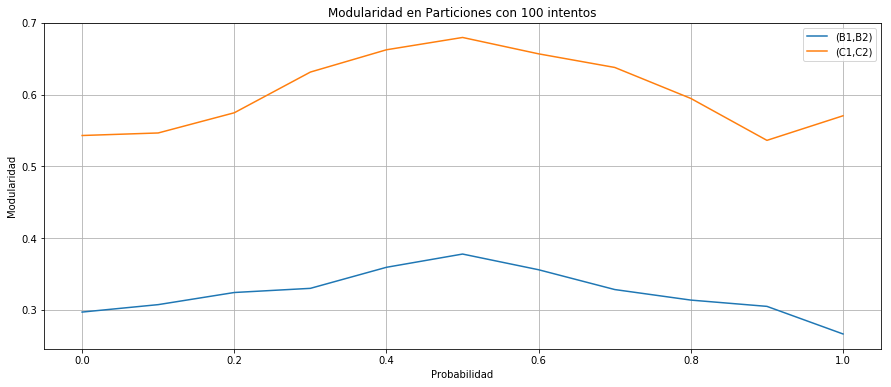

In [4]:
titulo = "Modularidad en Particiones con "+str(NNN)+" intentos"
plt.figure(figsize=(15,6))
plt.plot(np.arange(0.0, 1.1, 0.1), mod1, label='(B1,B2)')
plt.plot(np.arange(0.0, 1.1, 0.1), mod2, label= '(C1,C2)')
plt.title(titulo)
plt.xlabel("Probabilidad") 
plt.ylabel("Modularidad")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()
plt.close()

Se aprecia que en ambos pares de particiones, cuando $p = 0.5$ existe una mayor modularidad, esto quiere decir que existen conexiones solidas entre las pariticiones creadas. Se asocia este fenómeno a uno de asignación de dirección de arcos de manera aleatorea mediante una distribución de bernoulli con probabilidad _p_.

Se ve en el gráfico que existe menos modularidad al usar la partición (B1, B2). Esto se explica ya que para el ejercicio es justamente en el caso de arcos entre las particiones _B_ en donde cambia la probabilidad de determinar la dirección entre los arcos de sus nodos, debilitándose más la cohesión entre ambos conjuntos. Por otro lado, en el caso de las particiones C, la probabilidad sólo afecta a una parte de los arcos de cada partición, por lo que se obtiene a la larga una firmeza mayor.

También en ambos métodos se observa que los mínimos se obtienen cuando la probabilidad es 0 o 1, ya que en estos extremos, las direcciones terminan siendo en un solo sentido, afectando a la cohesión entre los conjuntos.


### 2) Baje "pescado.gdf"...

#### (a) Obtenga la matriz de adyacencia de la red y úsela para evaluar la reciprocidad corregida de la red.

Se obtiene la matriz:
(fue demasiado grande como para mostrarla)

In [5]:
pescado = ig.read("Datos/pescado.gml")
matrAdjPescado = pescado.get_adjacency()

In [6]:
vertices = matrAdjPescado.shape[0]
arcos = 0

repr1 = 0

for i in range(matrAdjPescado.shape[0]):
    for j in range(matrAdjPescado.shape[1]):
        if i != j:
            repr1 += matrAdjPescado[i][j]*matrAdjPescado[j][i]
        if matrAdjPescado[i][j] != 0:
            arcos += 1

repr1 = repr1/float(arcos)

print "Reprocicidad:\t\t", repr1

A = float(arcos)/(vertices*(vertices-1))
rep = (repr1-A)/(1-A)

print "Reporcicidad Corregida:\t", rep

Reprocicidad:		0.467201166181
Reporcicidad Corregida:	0.393755973776


Los valores anteriores indican que existe reprocicidad en la red, ya que las magnitudes son mayores a cero y cercanas a un 40%.

#### (c) Grafique las distribuciones P ($s_{in}$) y P ($s_{out}$) , donde $s_{in}$ (resp. $s_{out}$) de un nodo se define como la suma de los pesos de los arcos que entran a él (resp., salen de él), Corresponden a algún tipo de distribución conocida? De ser así, estime sus parámetros.

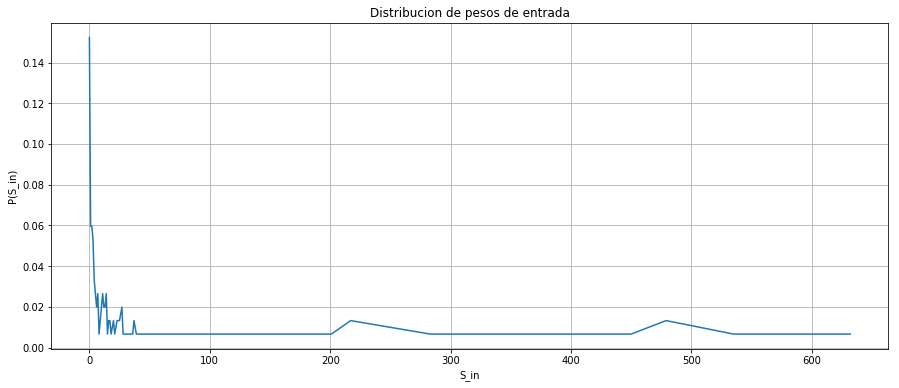

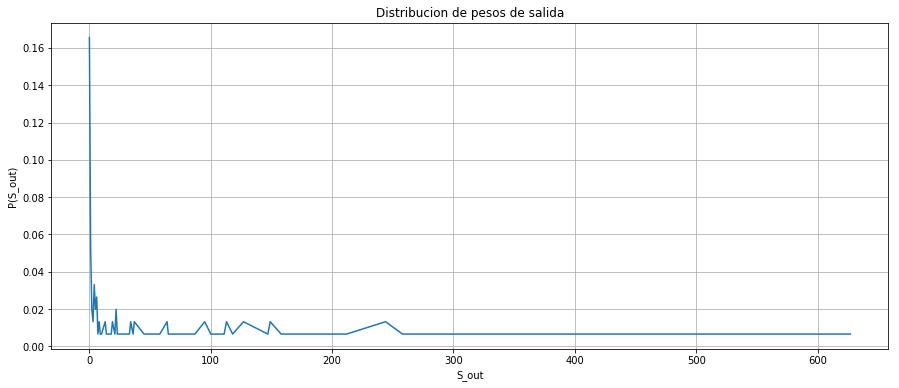

In [7]:
S_in = []
tot_in = 0
S_out = []
tot_out = 0

for nodo in range(len(pescado.vs)):
    cont_in = 0
    cont_out = 0

    for arco in pescado.es.select(_source=nodo):
        cont_out += arco['value']
        tot_out += arco['value']

    for arco in pescado.es.select(_to=nodo):
        cont_in += arco['value']
        tot_in += arco['value']

    S_in.append(cont_in)
    S_out.append(cont_out)


S_in_plot = sorted(set(map(int,S_in)))
P_S_in_plot =  map( lambda x: map(int,S_in).count(x)/float(len(S_in)) , S_in_plot)

S_out_plot = sorted(set(map(int,S_out)))
P_S_out_plot =  map( lambda x: map(int,S_out).count(x)/float(len(S_out)) , S_out_plot)

# se cortó un poco de la cola para que se pueda
# apreciar mejor la forma de los primeros puntos
plt.figure(figsize=(15,6))
plt.plot(S_in_plot[:-15] ,P_S_in_plot[:-15])
plt.title("Distribucion de pesos de entrada")
plt.xlabel("S_in") 
plt.ylabel("P(S_in)")
plt.grid(True)
plt.show()
plt.close()

plt.figure(figsize=(15,6))
plt.plot(S_out_plot[:-25] ,P_S_out_plot[:-25])
plt.title("Distribucion de pesos de salida")  
plt.xlabel("S_out") 
plt.ylabel("P(S_out)")
plt.grid(True)
plt.show()
plt.close()

En los gráficos anteriores se observan muchos valores fuera del grupo grueso de la población. Esto quiere decir, que existe una mayor probabilidad de encontrar S_in y S_out en una vecindad cercana a cero (0-10).

Ambos gráficos son similares, pero en ellos no se puede asociar una distribución de probabilidad conocida de manera clara. Siendo optimistas, una distribución que se puede parecer es la exponencial o la función y=1/x, pero considerando que existen montes se hace difícil estimar parámetros.

#### (d) Plotee ($s_{in}$ , $s_{out}$) , para el conjunto de nodos. Se ve algún tipo de relación entre esas 2 variables?

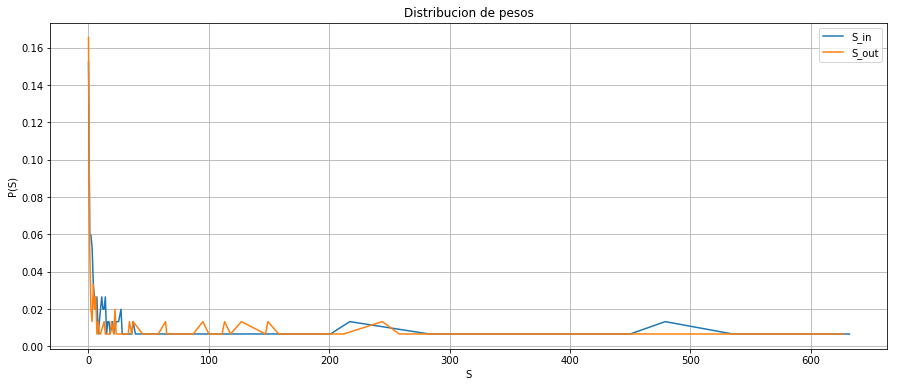

In [8]:
plt.figure(figsize=(15,6))
plt.plot(S_in_plot[:-15] ,P_S_in_plot[:-15], label='S_in')
plt.plot(S_out_plot[:-25] ,P_S_out_plot[:-25], label= 'S_out')
plt.title("Distribucion de pesos")
plt.xlabel("S") 
plt.ylabel("P(S)")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()
plt.close()

Son muy similares los dos gráficos ya que ambas distribuciones encuentran sus mayores valores en los nodos cercanos a cero y luego decrecen en una forma parecida a la exponencial. También se observa la existencia de montes luego de alcanzar un mínimo, lo que indica un comportamiento no deseado.

#### Ahora convierta su red en una red no dirigida. Para eso, pondremos una arista entre par de nodos que estaban conectados por uno o dos arcos, y le asociaremos como peso la suma de los pesos de esos arcos.

In [9]:
pescado2 = ig.read("Datos/pescado.gml")
pescado2.to_undirected(mode="collapse", combine_edges="sum")
ig.summary(pescado2)

IGRAPH U--- 151 2103 -- 
+ attr: ModularityClass (v), graphics (v), id (v), label (v), id (e), value (e)


#### e) Evalúe P (k) , P (s) y P (w) para esta nueva versión de la red.

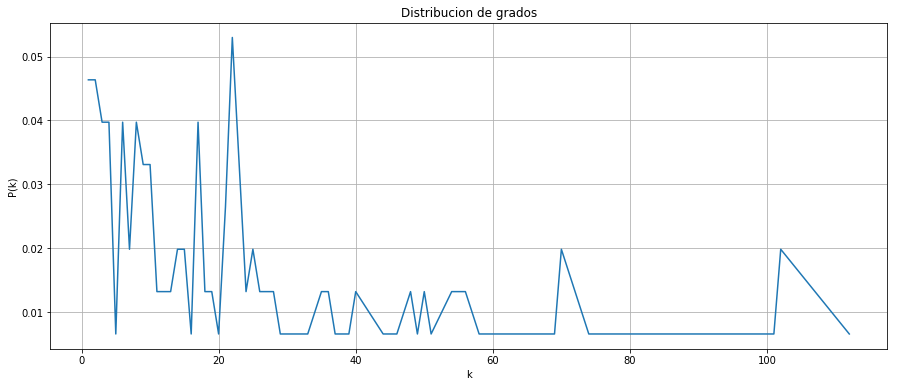

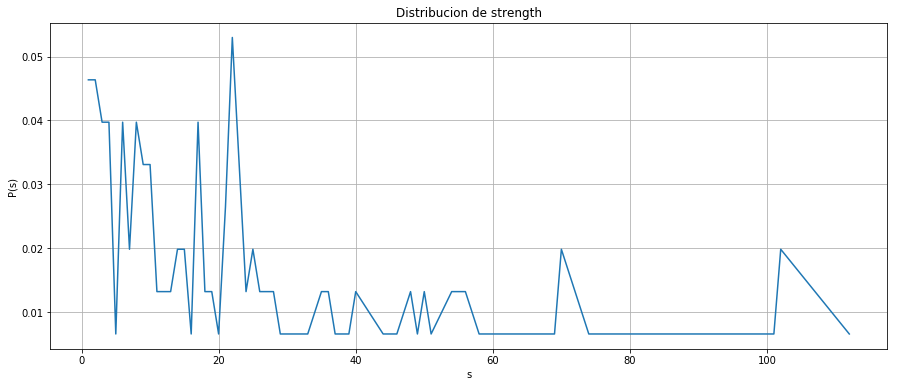

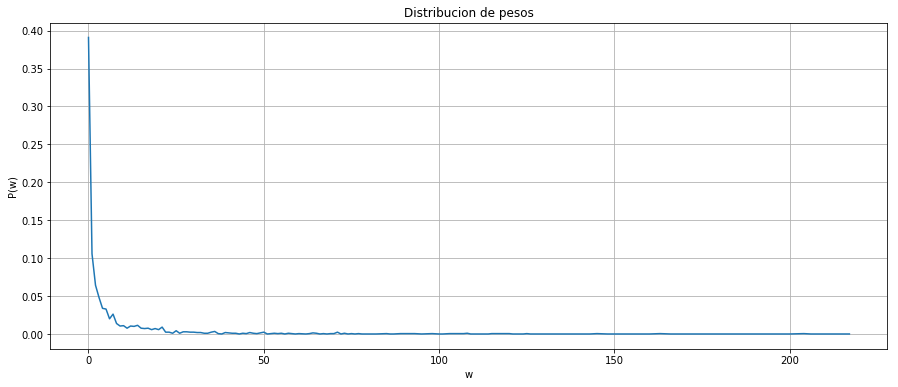

In [10]:
#grados
k= pescado2.outdegree()
k_plot = sorted(set(k))
P_k_plot=  map( lambda x: k.count(x)/float(len(k)) , k_plot)

plt.figure(figsize=(15,6))
plt.plot(k_plot , P_k_plot)
plt.title("Distribucion de grados")
plt.xlabel("k") 
plt.ylabel("P(k)")
plt.grid(True)
plt.show()
plt.close()

#strength
s = pescado2.strength()
s_plot = sorted(set(s))
P_s_plot=  map( lambda x: s.count(x)/float(len(s)) , s_plot)

plt.figure(figsize=(15,6))
plt.plot(s_plot , P_s_plot)
plt.title("Distribucion de strength")
plt.xlabel("s") 
plt.ylabel("P(s)")
plt.grid(True)
plt.show()
plt.close()

#pesos
w = []
for edge in pescado2.es:
    w.append(edge['value'])

w_plot = sorted(set(map(int,w)))
P_w_plot =  map( lambda x: map(int,w).count(x)/float(len(w)) , w_plot)

#se extraen los ultimos 50 para tener visual mas clara
plt.figure(figsize=(15,6))
plt.plot(w_plot[:-50] , P_w_plot[:-50])
plt.title("Distribucion de pesos")
plt.xlabel("w") 
plt.ylabel("P(w)")
plt.grid(True)
plt.show()
plt.close()

La distribución de grados y de fuerza es exactamente igual, dado a la dependencia de estas variables, mientras que la distribución de pesos posee un comportamiento exponencial.

#### f) Plotee el grado vs la fuerza de los nodos.

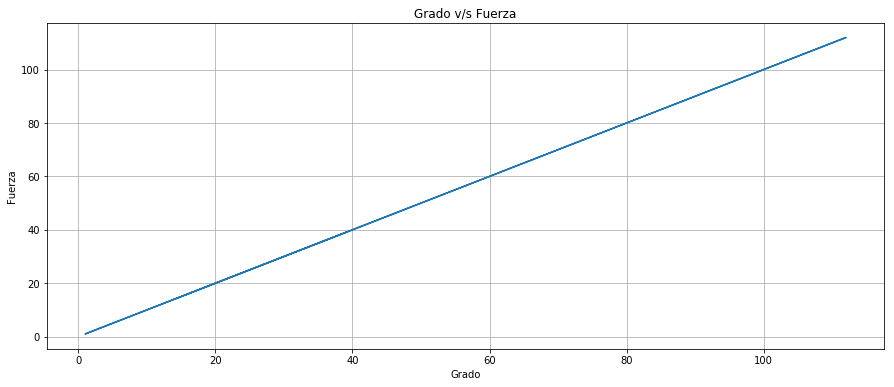

In [11]:
k= pescado2.indegree() #grado
s = pescado2.strength() #fuerza
plt.figure(figsize=(15,6))
plt.plot(k , s)
plt.title("Grado v/s Fuerza")
plt.xlabel("Grado") 
plt.ylabel("Fuerza")
plt.grid(True)
plt.show()
plt.close()

Se observa una relación lineal, lo quen indica una dependencia existente entre el grado y la fuerza de un nodo. Este comportanmiento es esperado, ya que la fuerza se define como la suma de los pesos de los arcos conectados a un nodo.

#### g) Evalúe el coeficiente de clustering de la red, con y sin pesos, y grafique también su dependencia respecto al grado.

In [12]:
grados = pescado2.degree()
clus1= pescado2.transitivity_local_undirected(vertices=pescado2.vs, mode="zero")
clus2 = pescado2.transitivity_local_undirected(vertices=pescado2.vs, mode="zero" ,weights= pescado2.es['value'])

clus_x_degree1 = []
clus_x_degree2 = []

for i in range(max(grados)+1):
    clus_x_degree1.append(list())
    clus_x_degree2.append(list())

    for j in range(len(grados)):
        if i == grados[j]:
            clus_x_degree1[i].append(clus1[j])
            clus_x_degree2[i].append(clus2[j])

plot_clus1 = []
plot_clus2 = []

for i in range(len(clus_x_degree1)):

    if len(clus_x_degree1[i]) > 0:
        plot_clus1.append(sum(clus_x_degree1[i])/len(clus_x_degree1[i]))

    if len(clus_x_degree2[i]) > 0:
        plot_clus2.append(sum(clus_x_degree2[i])/len(clus_x_degree2[i]))


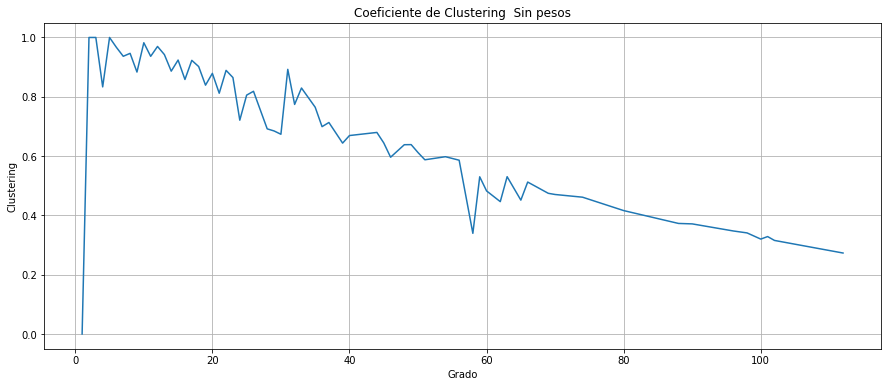

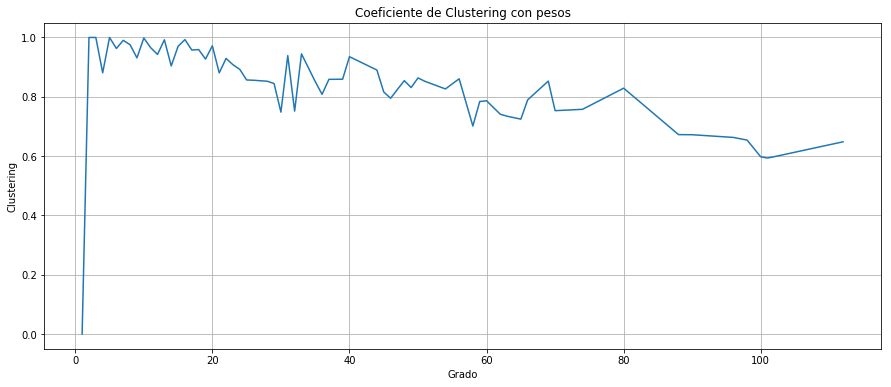

In [13]:
plt.figure(figsize=(15,6))
plt.plot(list(set(grados)),plot_clus1, label='Clustering sin Pesos')
plt.title("Coeficiente de Clustering  Sin pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()

plt.figure(figsize=(15,6))
plt.plot(list(set(grados)), plot_clus2, label='Clustering con Pesos')
plt.title("Coeficiente de Clustering con pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()

En Ambos gráficos se  ebserva una tendencia decreciente a medida que el grado del nodo aumenta, lo que es correcto, ya que a mayor grado, indica mas conexiones con los nodos vecinos y esto tiende a disminuir el grado de agrupación con sus vecinos.
También se observa que el coeficiente de clustering es mayor cuando se consideran los pesos de la red, ya que los pesos tienen relación con la fierza de cohesión y transitividad entre los nodos.

### 3. Baje “Scientometrics.net”.

#### a) Determine la cantidad total de triángulos de cada tipo presentes en la red: $t_0$, $t_1$, $t_2$, y $t_3$.

Como igraph posee una función que los calcula todos, aprovecharé de mostrar aquellos con mayor valor.

In [14]:
g = ig.read("Datos/scientometrics.net")
motivos = g.motifs_randesu()
print motivos, "\n" 


for i in motivos:
    if i>0:
        print "Motifs tipo "+ str(motivos.index(i))+": "+str(i)

[nan, nan, 16464, nan, 9761, 3, 22575, 1777, 0, 3, 0, 0, 0, 0, 0, 0] 

Motifs tipo 2: 16464
Motifs tipo 4: 9761
Motifs tipo 5: 3
Motifs tipo 6: 22575
Motifs tipo 7: 1777
Motifs tipo 5: 3


El tipo de motivo más representado es el tipo 6, seguido del tipo 2 y tipo 4.

6: Dos autores citan al mismo y se citan entre ellos. **(10 en Milo et al)**

2: Autor1 cita a Autor2 y este a Autor3 **(3 en Milo et al)**

4: Dos autores 1 y 2 citando al mismo Autor3 **(2 en Milo et al)**

*Quise comparar los tipos de grafo con los de milo et al, pero me di cuenta de que los tipos de la diapo 23 no coincidían con los que usa milo en la diapo 25. Con lo que no supe si realmente eran los mismos o no. De todas formas si nos basamos en lo que se ve en la diapo 23 hace sentido, puesto que son las situaciones más recurrentes de citaciones entre documentos. Al comparar estos con sus símiles en Milo et al, se ve cierta semejanza con las probabilidades de las muestras sociales (el 3er gráfico) ya que al ser el z-score más cercano a 0 estas se vuelven más probables.*

### 4. El archivo cities.txt contiene una serie de numeros...

#### a) que pasa si calcula la pendiente del histograma log/log?

In [15]:
# Uso de librerias y archivos
import powerlaw                         # pip install powerlaw
import matplotlib.pyplot as plt
import matplotlib
import numpy
import seaborn
import pandas
%matplotlib inline

In [16]:
cities = numpy.genfromtxt('Datos/cities.txt')
print(type(cities),cities.shape)

(<type 'numpy.ndarray'>, (19447,))


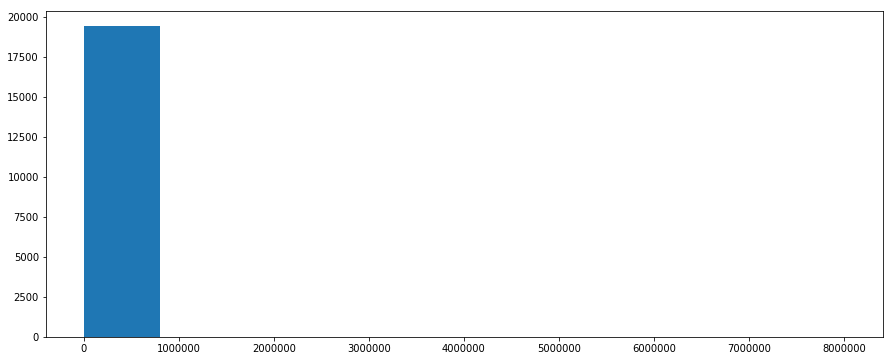

In [17]:
plt.figure(figsize=(15,6))
plt.hist(cities)
plt.show()

Calculando pendiente con la fórmula de una recta: $$\frac{y_2-y_1}{x_2-x_1}$$

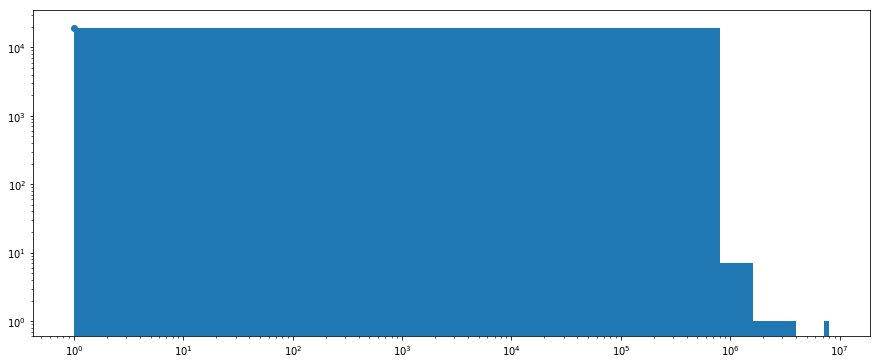

Pendiente:	-0.0024208815140323845


In [18]:
plt.figure(figsize=(15,6))
plt.hist(cities)
hx,x= np.histogram(cities,bins='doane')
hxl = [numpy.max(hx),numpy.min(hx)]
xl = [numpy.min(x), numpy.max(x)]
plt.xscale('log')
plt.yscale('log')
plt.scatter(xl,[hxl[0],hxl[1]])
slope = (hxl[1]-hxl[0]) /(xl[1]-xl[0])
plt.show()
print("Pendiente:\t"+str(slope))

#### b) y si aplica binning? (agrupando valores con ventanas de un tamaño exponencial)

Entregando la pendiente como el valor promedio acumulado:

Min: 1.0, Max:8008654.0


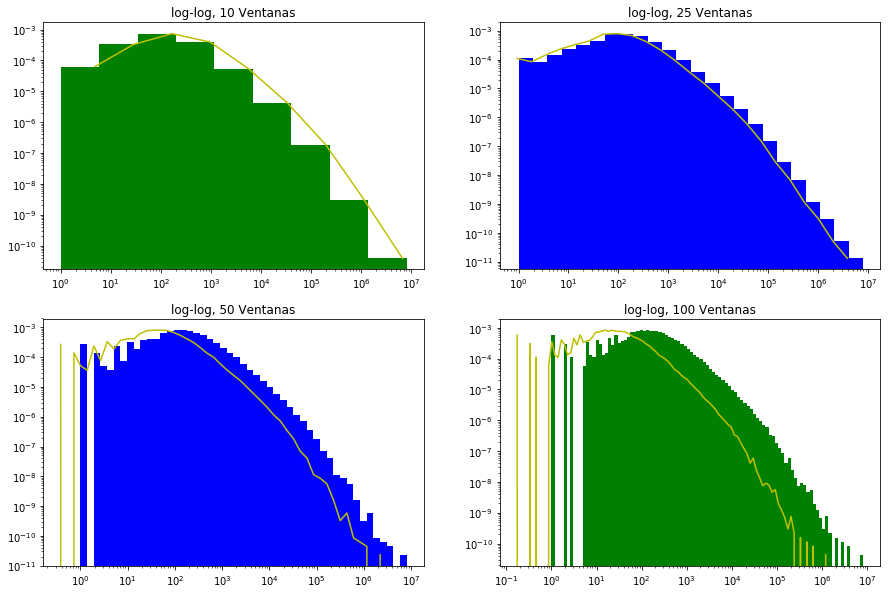

Pendiente: -8.14584241533e-11


In [19]:
plt.clf()
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

min_, max_ = np.min(cities), np.max(cities)
print('Min: {}, Max:{}'.format(min_, max_))

bins = np.logspace(np.log10(min_),np.log10(max_),10)
ax1.set_title('log-log, 10 Ventanas')
ax1.set_xscale('log')
ax1.set_yscale('log')
h, e,_=ax1.hist(cities, bins=bins, normed=True,log=True,color='g')
ax1.plot(bins[1:]-bins[:-1],h, color='y')


bins = np.logspace(np.log10(min_),np.log10(max_),25)
ax2.set_title('log-log, 25 Ventanas')
ax2.set_xscale('log')
ax2.set_yscale('log')
h, e,_=ax2.hist(cities, bins=bins, normed=True,log=True,color='b')
ax2.plot(bins[1:]-bins[:-1],h, color='y')

middle_estp = e[1:] - e[:-1]
slope, intercept = np.polyfit(middle_estp, h, 1) 

bins = np.logspace(np.log10(min_),np.log10(max_),50)
ax3.set_title('log-log, 50 Ventanas')
ax3.set_xscale('log')
ax3.set_yscale('log')
h, e,_=ax3.hist(cities, bins=bins, normed=True,log=True,color='b')
ax3.plot(bins[1:]-bins[:-1],h, color='y')

bins = np.logspace(np.log10(min_),np.log10(max_),100)
ax4.set_title('log-log, 100 Ventanas')
ax4.set_xscale('log')
ax4.set_yscale('log')
h, e,_=ax4.hist(cities, bins=bins, normed=True,log=True,color='g')
ax4.plot(bins[1:]-bins[:-1],h, color='y')
plt.show()

print('Pendiente: {}'.format(slope))

Se calculó la pendiente del 3er grágico, que se ve como el más continuo y sin caídas abruptas a 0.

#### c) y si pasa a la distribución acumulada?

In [20]:
def plot_ccdf(data,ax):
    sorted_vals = numpy.sort(numpy.unique(data))
    ccdf = numpy.zeros(sorted_vals.shape[0])
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = numpy.sum(data >= val)/n
    ax.plot(sorted_vals, ccdf,'-')
    return ccdf

def plot_cdf(data,ax):
    sorted_vals = numpy.sort(numpy.unique(data))
    cdf = numpy.zeros(sorted_vals.shape[0])
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        cdf[i] = numpy.sum(data <= val)/n
    ax.plot(sorted_vals, cdf,'-')
    return cdf

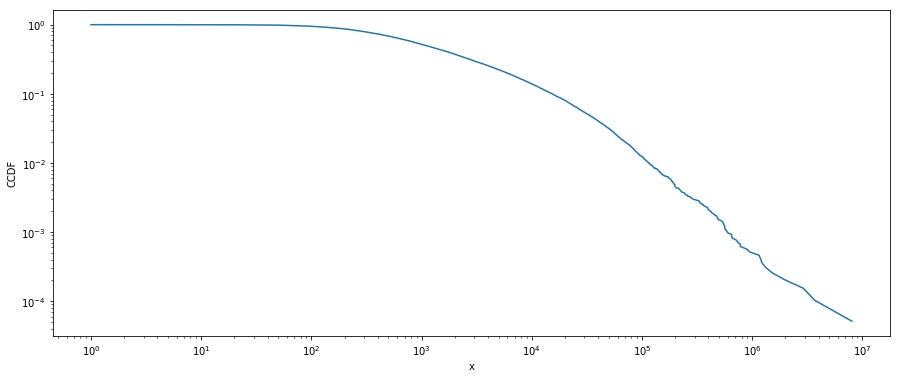

In [21]:
plt.clf()
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('x')
ax1.set_ylabel('CCDF')
data = plot_ccdf(cities,ax1)
plt.show()

Por recomendacion de un compañero de clase se optó por buscar pendiente por el método de máxima verosimilitud:

[4.726033817890496, 194.7537585303058, 3727.0338178904967, 7453.067635780993, 37261.33817890497, 195457.55598508174]


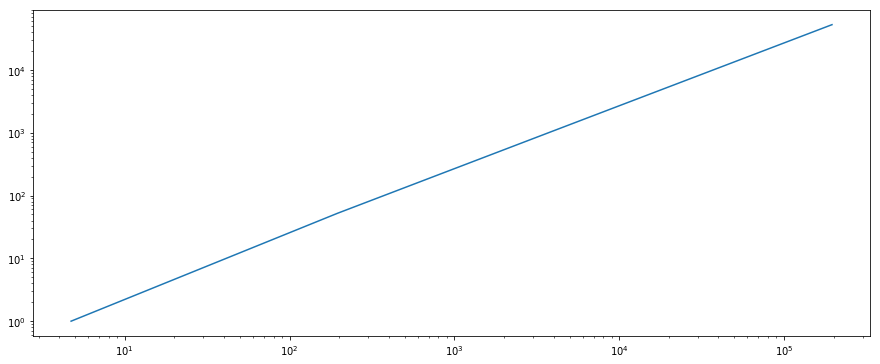

Pendiente: 3.72603381789


In [22]:
def alpha(data,xmin,n):
    alpha = 1 + n/numpy.sum((data/(xmin)))
    return alpha

l = []
ll = [1, 52, 10**3, 2*10**3, 10**4, 52457]
for i in ll:
    n = alpha(data,i,len(data))
    l.append(n)

print l

plt.clf()
plt.figure(figsize=(15, 6))
plt.loglog(l,ll)
plt.show()

slope, intercept = np.polyfit(ll, l, 1) 




print('Pendiente: {}'.format(slope))

No me hace mucho sentido, pero ha pasado tanto tiempo desde el paro que no recuerdo lo que tenía en mente entonces o si estaba bien o no :(

### 5. Jugando con arena

#### Genere dos redes, una ER y otra Barabási-Albert, ambas con 1000 nodos y grado promedio 2...

In [23]:
from igraph import *
from random import randrange
import pandas as pd
import scipy.stats as stats

In [24]:
# para tener la chance de 1/1000 de que no se pase un grano
def rand_bool(valor = 1):
    return randrange(1000) > valor

# el agregar un grano y revisar si hay rebalse
def agregar_grano(nodo_random, grafo, grados_baldes, inicios_baldes, tamano_avalancha):
    rebalse = False
    if inicios_baldes[nodo_random] < grados_baldes[nodo_random]:
        inicios_baldes[nodo_random] += 1
        return inicios_baldes, tamano_avalancha
    else:
        rebalse = True
        vecinos = grafo.neighbors(nodo_random)
        inicios_baldes[nodo_random] -= len(vecinos)
        tamano_avalancha += len(vecinos)
        for vecino in vecinos:
            if rand_bool():
                inicios_baldes, tamano_avalancha = agregar_grano(vecino, grafo, grados_baldes,
                                                                 inicios_baldes, tamano_avalancha)
        return inicios_baldes, tamano_avalancha

In [25]:
# creacion de grafos
ErdosR  =  Graph().Erdos_Renyi(n = 1000, m = 1000)
BarraA  =  Graph().Barabasi(n = 1000)
grados = ErdosR.degree_distribution()
print ("Grado ER: ", grados.mean)
grados = BarraA.degree_distribution()
print ("Grado BA: ", grados.mean)    

('Grado ER: ', 1.999999999999998)
('Grado BA: ', 1.9979999999999987)


1000 	2000 	3000 	4000 	5000 	6000 	7000 	8000 	9000 	10000 	
done!


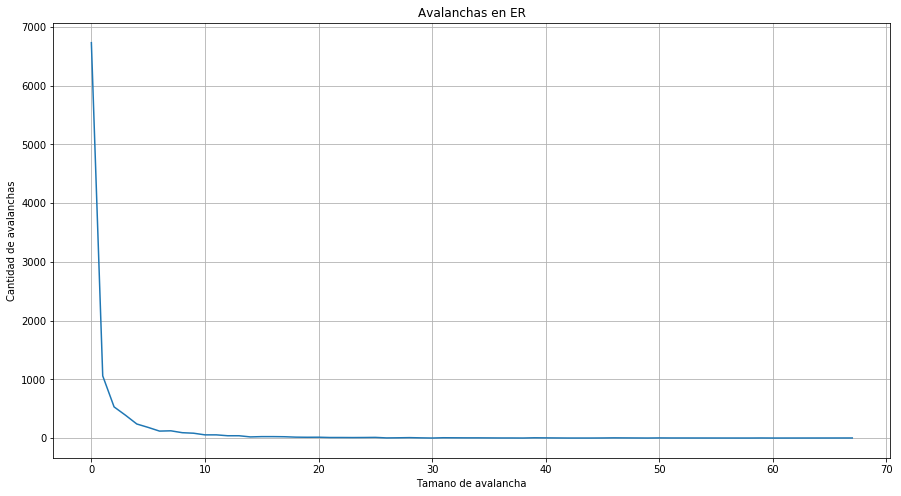

In [32]:
# cantidad de pruebas:
NNN = 10000

# Erdos Renyi:
grados_baldes = ErdosR.degree()
inicios_baldes = list(np.zeros(1000))
avalanchas = []
rebalse = False
for v in range(NNN):
    if (v+1)%(NNN/10) == 0:
        print (v+1),"\t",
    avalancha = 0
    nodo_random = np.random.randint(1000)
    inicios_baldes,avalancha = agregar_grano(nodo_random, ErdosR, grados_baldes, 
                                             inicios_baldes, avalancha)
    avalanchas.append(avalancha)
valores = sorted(set(avalanchas))
freqs = []
for i in valores:
    freqs.append(avalanchas.count(i))
print "\ndone!"

plt.figure(figsize = (15, 8))
plt.plot(valores, freqs)
plt.title("Avalanchas en ER")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.grid(True)
plt.show()

Aquí se observa que la frecuencia de las avalanchas decrece de manera exponencial respecto de su tamaño, lo que tiene sentido ya que es difícil que se propague una avalancha a gran escala si se añaden nodos al azar y el resto de los nodos se encuentra vacío. Luego se quiso probar con Barabasi:

1000 	2000 	3000 	4000 	5000 	6000 	7000 	8000 	9000 	10000 	
done!


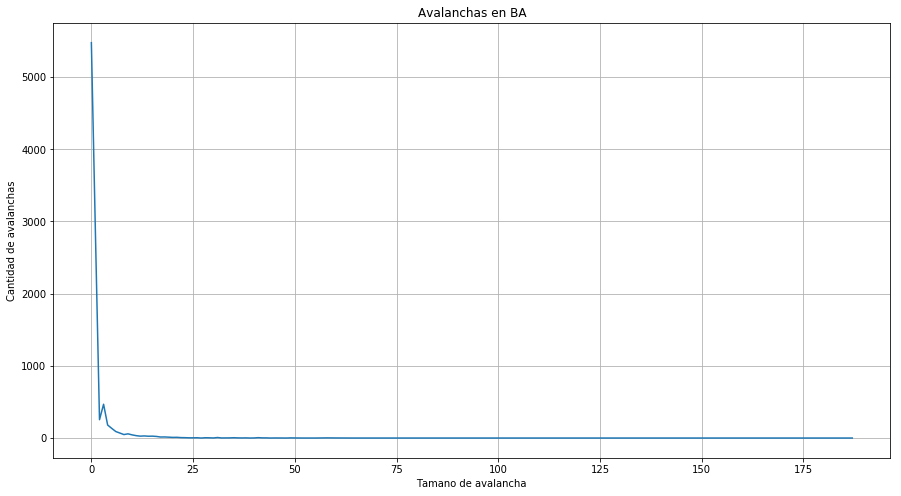

In [33]:
# Barabasi Albert:
grados_baldes = BarraA.degree()
inicios_baldes = list(np.zeros(1000))
avalanchas = []
rebalse = False
for v in range(NNN):
    if (v+1)%(NNN/10) == 0:
        print (v+1),"\t",
    avalancha = 0
    nodo_random = np.random.randint(1000)
    inicios_baldes,avalancha = agregar_grano(nodo_random, BarraA, grados_baldes,inicios_baldes,avalancha)
    avalanchas.append(avalancha)
valores2 = sorted(set(avalanchas))
freqs2 = []
for i in valores2:
    freqs2.append(avalanchas.count(i))
print "\ndone!"

plt.figure(figsize = (15, 8))
plt.plot(valores2,freqs2)
plt.title("Avalanchas en BA")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.grid(True)
plt.show()

Nuevamente se aprecia el mismo efecto, aunque en este caso es menos estable. Se graficarán ambas para ver si algo cambia:

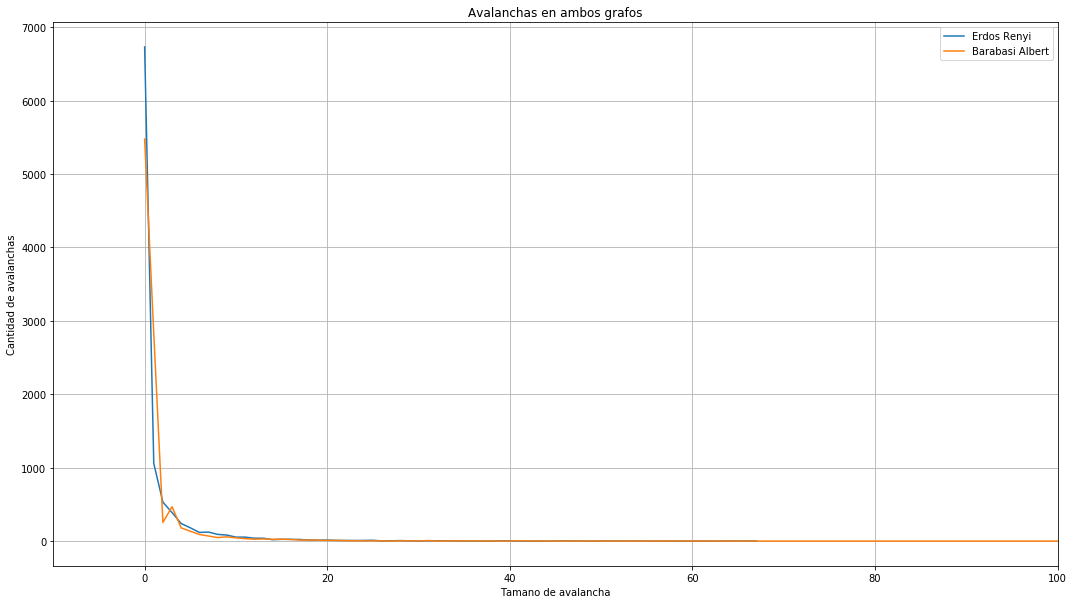

In [34]:
plt.figure(figsize = (18, 10))
plt.plot(valores, freqs, label="Erdos Renyi")
plt.plot(valores2, freqs2, label="Barabasi Albert")
plt.title("Avalanchas en ambos grafos")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.grid(True)
plt.legend(loc="upper right")
plt.xlim((-10, 100))
plt.show()

Sólo para probar si cambia en algo se prueba denuevo con 1 Millón de granos:


Erdos Renyi:
100000 	200000 	300000 	400000 	500000 	600000 	700000 	800000 	900000 	1000000 	
done!


Barabasi Albert:
100000 	200000 	300000 	400000 	500000 	600000 	700000 	800000 	900000 	1000000 	
done!


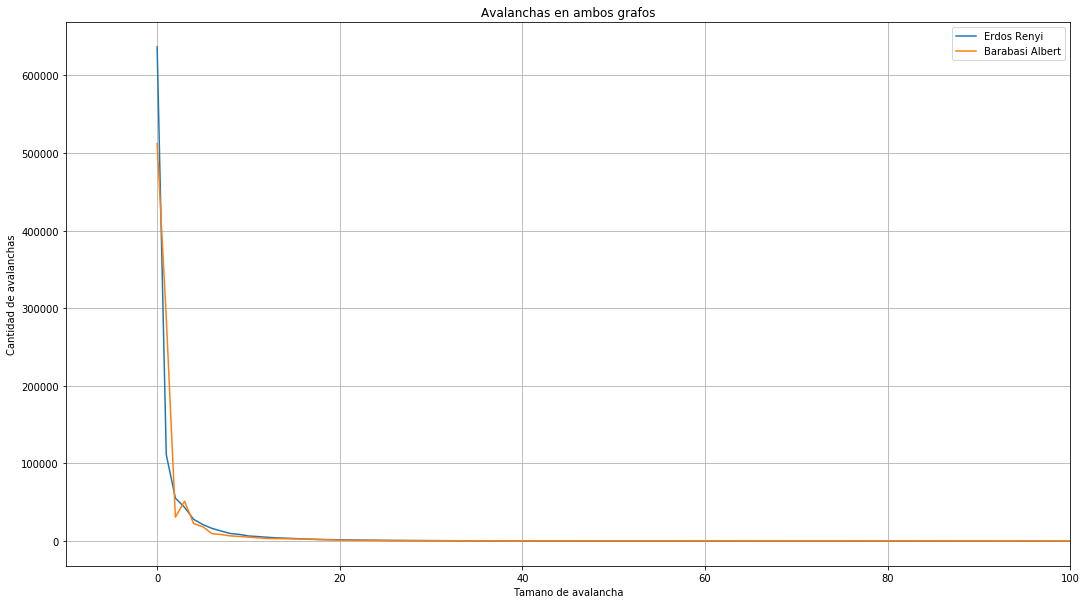

In [36]:
# cantidad de pruebas:
NNN = 1000000

# Erdos Renyi:
print "\nErdos Renyi:"
grados_baldes = ErdosR.degree()
inicios_baldes = list(np.zeros(1000))
avalanchas = []
rebalse = False
for v in range(NNN):
    if (v+1)%(NNN/10) == 0:
        print (v+1),"\t",
    avalancha = 0
    nodo_random = np.random.randint(1000)
    inicios_baldes,avalancha = agregar_grano(nodo_random, ErdosR, grados_baldes, 
                                             inicios_baldes, avalancha)
    avalanchas.append(avalancha)
valores = sorted(set(avalanchas))
freqs = []
for i in valores:
    freqs.append(avalanchas.count(i))
print "\ndone!\n"


print "\nBarabasi Albert:"
grados_baldes = BarraA.degree()
inicios_baldes = list(np.zeros(1000))
avalanchas = []
rebalse = False
for v in range(NNN):
    if (v+1)%(NNN/10) == 0:
        print (v+1),"\t",
    avalancha = 0
    nodo_random = np.random.randint(1000)
    inicios_baldes,avalancha = agregar_grano(nodo_random, BarraA, grados_baldes,inicios_baldes,avalancha)
    avalanchas.append(avalancha)
valores2 = sorted(set(avalanchas))
freqs2 = []
for i in valores2:
    freqs2.append(avalanchas.count(i))
print "\ndone!"

plt.figure(figsize = (18, 10))
plt.plot(valores, freqs, label="Erdos Renyi")
plt.plot(valores2, freqs2, label="Barabasi Albert")
plt.title("Avalanchas en ambos grafos")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.grid(True)
plt.legend(loc="upper right")
plt.xlim((-10, 100))
plt.show()

Sorprendentemente se ve igual, pero observando se nota que la escala cambió, puesto que la cantidad de avalanchas aumentó en la misma proporción. Se concluye entonces que el efecto es el mismo a pesar de la cantidad de granos, puesto que es la estructura del grafo la que produce ese efecto.